# Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Importing the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

This is an already preprocessed data splitted into train-test as well.

x_train's shape being (60000, 28, 28) signifies that it contains 60k grayscale images of 28x28 px.

5

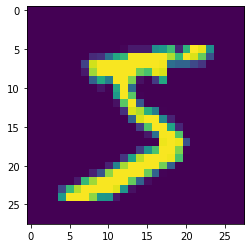

In [3]:
plt.imshow(x_train[0])
y_train[0]

As the features are all in common dimensions then no need of feature scaling is there.

# Building a simple Neural Network

Setting up the layers of neural network

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

Compiling the model

In [5]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

Training the neural network

In [6]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6326 - accuracy: 0.8152
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3730 - accuracy: 0.9045
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3009 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2591 - accuracy: 0.9329
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2287 - accuracy: 0.9395
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2010 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1772 - accuracy: 0.9517
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1566 - accuracy: 0.9552
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1465 - accuracy: 0.9589
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.132

Training data accuracy we get after this is 96.34%.

array([[2.7483702e-04, 9.2524755e-01, 9.9879509e-01, 9.9595606e-01,
        5.2031976e-01, 7.0179790e-02, 5.0176709e-07, 9.9999905e-01,
        7.8882396e-01, 9.8048139e-01]], dtype=float32)

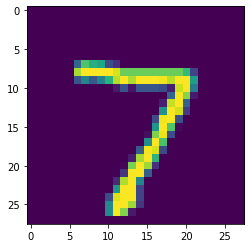

In [7]:
plt.imshow(x_test[0])
model.predict(x_test[0:1])

`model.predict()` gives the prediction probabilities of each output class for the data input.

Converting these probabilities into the class is then done.

In [8]:
pred = np.argmax(model.predict(x_test[0:1]))
pred, y_test[0]

(7, 7)

# Model Evaluation

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1646 - accuracy: 0.9576


(0.16458870470523834, 0.9575999975204468)

## Confusion Matrix

In [25]:
y_pred = np.array([np.argmax(i) for i in model.predict(x_test)])
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 943,    0,    4,    0,    3,    4,   19,    2,    4,    1],
       [   1, 1118,    3,    1,    1,    2,    1,    0,    7,    1],
       [  10,  301,  687,    6,    5,    0,    1,    8,   14,    0],
       [   1,  160,  255,  569,    1,   10,    0,    6,    6,    2],
       [   3,    1,    5,    1,  935,    3,    1,    2,    6,   25],
       [   5,    9,   28,  255,    6,  569,    4,    3,   10,    3],
       [ 676,   22,   14,    0,   25,  112,  100,    0,    9,    0],
       [   4,    8,  153,    8,    6,    1,    0,  833,    5,   10],
       [   4,    0,    8,    7,    4,    6,    3,    3,  932,    7],
       [   6,    2,   23,   22,  105,   67,    0,   61,    5,  718]])>

Text(0.5, 42.0, 'Predicted Labels')

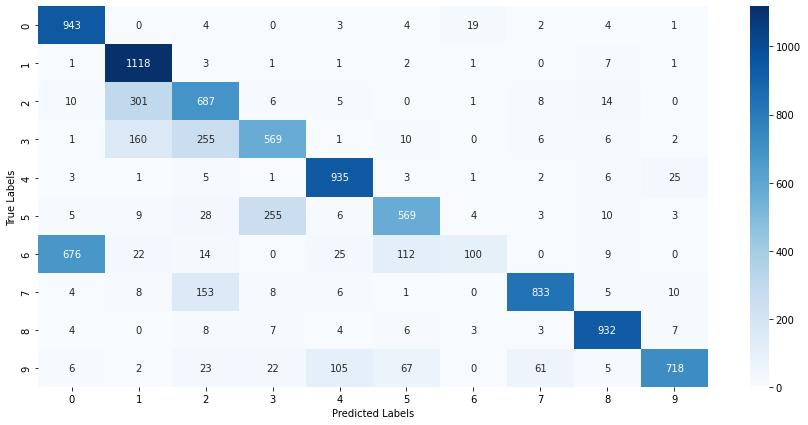

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')